# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [2]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [4]:
pd.read_excel('richpeople.xlsx')
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [5]:
df.shape

(1653, 30)

In [6]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [7]:
df.sort_values(by='networthusbillion', ascending= False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [17]:
df.networthusbillion.value_counts() #they all own at least one billion

1.1     102
1.2      93
1.3      88
1.0      81
1.4      76
       ... 
14.6      1
9.9       1
17.7      1
14.7      1
11.6      1
Name: networthusbillion, Length: 166, dtype: int64

In [18]:
df.gender.value_counts() #so this is the amount of female and male billionaires
#value count just shows the order in each of the things I am calling wiht df

male      1473
female     180
Name: gender, dtype: int64

In [48]:
df.gender.value_counts(normalize=True) #this is just a first step to reach the below




male      0.891107
female    0.108893
Name: gender, dtype: float64

In [50]:
#df.gender.value_counts(normalize=True)

df.groupby(by='gender').networthusbillion.sum() #2nd step. i don't need the sum






gender
female     705.7
male      5748.7
Name: networthusbillion, dtype: float64

In [51]:
df.groupby(by='gender').networthusbillion.mean() #3rd step, i use mean instead and get the reult
#it shows that female in average are slightly richer

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [52]:
df.selfmade.value_counts() #most commen type is self-made

self-made    1146
inherited     505
Name: selfmade, dtype: int64

In [55]:
df.groupby(by='selfmade').gender.value_counts() #this shows me the absolute numbers of male/female billionaires  


selfmade   gender
inherited  male       363
           female     142
self-made  male      1108
           female      38
Name: gender, dtype: int64

In [63]:
df.groupby(by='selfmade').gender.value_counts(normalize=True) #what does that exactly show? how to I get percentage out

selfmade   gender
inherited  male      0.718812
           female    0.281188
self-made  male      0.966841
           female    0.033159
Name: gender, dtype: float64

In [64]:
df.groupby(by='selfmade').gender.value_counts(normalize=True).mul(100).round(1).astype(str) + '%' #that trick from the internet 
#(trick is everythin after. true) gives me percentages. But its counting within inherited and self made. I am not sure waht this
#normalize = True does

selfmade   gender
inherited  male      71.9%
           female    28.1%
self-made  male      96.7%
           female     3.3%
Name: gender, dtype: object

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<AxesSubplot:>

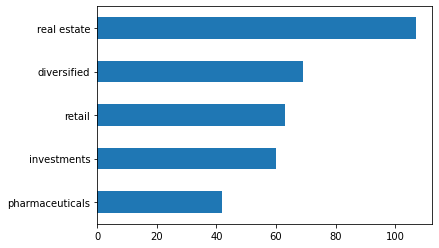

In [90]:
df.sourceofwealth.value_counts().head(5).sort_values().plot(kind='barh') #is that correct? what does it really count?

## 7) How much money do these billionaires have in total?

In [148]:
df.sourceofwealth.value_counts().head(5).sum()

341

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [93]:
df.groupby(by='citizenship').networthusbillion.sum() #this is not very helpful it gives me the sorting alphabetical to country

citizenship
Algeria                    3.2
Angola                     3.7
Argentina                 11.3
Australia                 85.4
Austria                   33.8
                         ...  
United Arab Emirates      14.6
United Kingdom           152.0
United States           2322.4
Venezuela                  9.0
Vietnam                    1.6
Name: networthusbillion, Length: 69, dtype: float64

In [126]:
df.groupby(by='citizenship').networthusbillion.sum().sort_values(ascending=False).head(10) #is this correct?

citizenship
United States     2322.4
Russia             422.5
Germany            401.4
China              375.8
France             235.3
Hong Kong          213.7
Brazil             192.2
India              191.9
Italy              158.1
United Kingdom     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [105]:
df.age.mean().round(1)

63.3

In [112]:
df.groupby(by='selfmade').age.mean().round(1)

selfmade
inherited    65.0
self-made    62.6
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [118]:
df.sort_values(by='age', ascending= True) #this shows the youngest


,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN
127,2014,"Anton Kathrein, Jr.",1270,Germany,DEU,1.4,inherited,inherited,male,29.0,...,relation,1919.0,NaN,antennas,3rd generation,NaN,http://www.forbes.com/profile/anton-kathrein-jr/#,NaN,NaN,NaN
394,2014,Drew Houston,1372,United States,USA,1.2,self-made,founder non-finance,male,30.0,...,founder,2007.0,NaN,Dropbox,NaN,NaN,http://en.wikipedia.org/wiki/Drew_Houston,http://en.wikipedia.org/wiki/Dropbox_(service),http://www.forbes.com/profile/drew-houston/,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2014,Tsai Cheng-da,988,Taiwan,Taiwan,1.8,inherited,inherited,male,NaN,...,relation,1962.0,NaN,finance,inherited from father,NaN,http://www.forbes.com/profile/tsai-cheng-da/,https://www.cathayholdings.com/holdings/web/ab...,NaN,NaN
1512,2014,Vanich Chaiyawan,429,Thailand,THA,3.7,self-made,self-made finance,male,NaN,...,Chairman,1942.0,NaN,"insurance, beverages",NaN,NaN,http://www.thailife.com/a-thai-company-for-tha...,"Business Times (Singapore) September 16, 1993",NaN,NaN
1516,2014,Victor Civita Neto,1540,Brazil,BRA,1.1,inherited,inherited,male,NaN,...,relation,1950.0,NaN,media,3rd generation,NaN,http://www.forbes.com/profile/roberta-anamaria...,NaN,NaN,NaN
1555,2014,Wang Wei,375,China,CHN,4.0,self-made,founder non-finance,male,NaN,...,founder,1993.0,NaN,delivery service,2013 Saw investment from outside investors wit...,NaN,http://www.forbes.com/profile/wang-wei/,NaN,NaN,NaN


In [131]:
df.sort_values(by='age', ascending= False) #this shows the oldest


,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN
588,2014,Henry Hillman,687,United States,USA,2.5,inherited,inherited,male,95.0,...,relation,1942.0,NaN,investments,inherited from father,NaN,http://www.forbes.com/profile/henry-hillman/,http://en.wikipedia.org/wiki/Calgon_Carbon,NaN,NaN
435,2014,Erika Pohl-Stroher,1154,Germany,DEU,1.5,inherited,inherited,female,95.0,...,relation,1880.0,NaN,hair products,3rd generation,23% stake in the company,http://www.forbes.com/profile/erika-pohl-stroher/,http://en.wikipedia.org/wiki/Wella,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2014,Tsai Cheng-da,988,Taiwan,Taiwan,1.8,inherited,inherited,male,NaN,...,relation,1962.0,NaN,finance,inherited from father,NaN,http://www.forbes.com/profile/tsai-cheng-da/,https://www.cathayholdings.com/holdings/web/ab...,NaN,NaN
1512,2014,Vanich Chaiyawan,429,Thailand,THA,3.7,self-made,self-made finance,male,NaN,...,Chairman,1942.0,NaN,"insurance, beverages",NaN,NaN,http://www.thailife.com/a-thai-company-for-tha...,"Business Times (Singapore) September 16, 1993",NaN,NaN
1516,2014,Victor Civita Neto,1540,Brazil,BRA,1.1,inherited,inherited,male,NaN,...,relation,1950.0,NaN,media,3rd generation,NaN,http://www.forbes.com/profile/roberta-anamaria...,NaN,NaN,NaN
1555,2014,Wang Wei,375,China,CHN,4.0,self-made,founder non-finance,male,NaN,...,founder,1993.0,NaN,delivery service,2013 Saw investment from outside investors wit...,NaN,http://www.forbes.com/profile/wang-wei/,NaN,NaN,NaN


<AxesSubplot:>

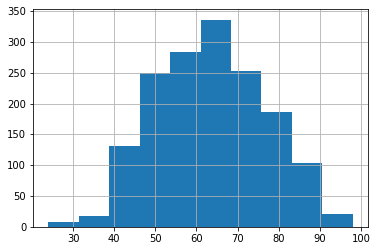

In [130]:
 #histogramm, shows the age distribution, but there are people who are 200 year old???? something is wrong
df.age.hist()

## 11) Make a scatterplot of net worth compared to age

<AxesSubplot:xlabel='age', ylabel='networthusbillion'>

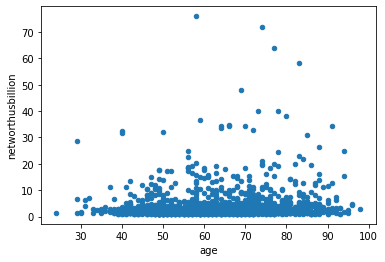

In [134]:
#WHAT WE DID BEFORE cats.sort_values('length').plot(kind='barh',x="name", y='length') #first part is cats.sort_values('length') THTEN we ad the rest
df.plot(kind='scatter', x='age', y='networthusbillion')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

In [ ]:
#cats.sort_values('length').plot(kind='barh',x="name", y='length') #first part is cats.sort_values('length')

In [136]:
df.sort_values(by='networthusbillion', ascending= False).head(10) #this shows the richest 10


,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


<AxesSubplot:ylabel='name'>

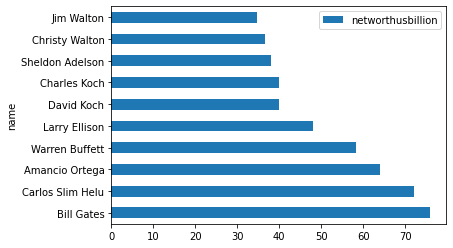

In [147]:
#now the graph
df.sort_values(by='networthusbillion', ascending= False).head(10).plot(kind='barh',x="name", y='networthusbillion')


<AxesSubplot:ylabel='name'>

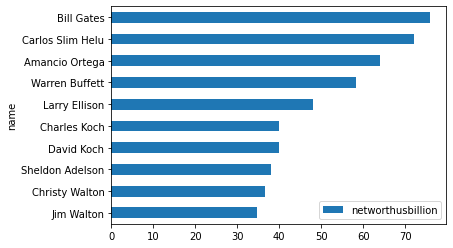

In [152]:
#now I don't like the order of that so I have to changes someting 
df.sort_values(by='networthusbillion', ascending= False).head(10).sort_values(by='networthusbillion', ascending=True).plot(kind='barh',x="name", y='networthusbillion')